# This notebook demonstrates basic machine learning concepts

Please fill in the codes between the ### START CODE HERE ### and ### END CODE HERE ### comments

##### Installing XGBoost and graphviz, uncomment it if you haven't do it

In [0]:
#! pip install xgboost graphviz

##### Importing the required libraries

In [0]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 500)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, \
precision_score, recall_score, f1_score, roc_curve, roc_auc_score, auc
from matplotlib import pyplot as plt
plt.style.use('seaborn')
import seaborn as sns
from datetime import datetime #for calculating running time

##### Uncomment this cell if you are using colab

In [0]:
from google.colab import drive
drive.mount('/content/drive/')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
cd '/content/drive/My Drive/workshop/LCAI2019/lesson4'

/content/drive/My Drive/workshop/LCAI2019/lesson4


In [0]:
ls

'Advanced_python(reference).ipynb'         UCI_Credit_Card.csv
'Advanced_python(student_version).ipynb'   winequality-white.csv
'credit_card(Student_version).ipynb'


# Default of Credit Card Clients Dataset

**Data sources**

**Google drive:** https://drive.google.com/file/d/1E5p9qQK8E3kemMBnGpC4RLSMOUr5RliY/view?usp=sharing

**Kaggle:** https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset/home

**UCI machine learning repository:** https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients#

----------------------------------

**Dataset Information**

This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

**Content**

**There are 25 variables:**

ID: ID of each client

LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit

SEX: Gender (1=male, 2=female)

EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

MARRIAGE: Marital status (1=married, 2=single, 3=others)

AGE: Age in years

PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)

PAY_2: Repayment status in August, 2005 (scale same as above)

PAY_3: Repayment status in July, 2005 (scale same as above)

PAY_4: Repayment status in June, 2005 (scale same as above)

PAY_5: Repayment status in May, 2005 (scale same as above)

PAY_6: Repayment status in April, 2005 (scale same as above)

BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

default.payment.next.month: Default payment (1=yes, 0=no)

# Setting the random seed and reading the data

In [0]:
RAND_SEED = 41
df = pd.read_csv('UCI_Credit_Card.csv')
df.head()



,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0




































# Exploratory data analysis

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null float64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null float64
BILL_AMT2                     30000 non-null float64
BILL_AMT3                     30000 non-null float64
BILL_AMT4                     30000 non-null float64
BILL_AMT5                     30000 non-null float64
BILL_AMT6   

In [0]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [0]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [0]:
df['default.payment.next.month'].value_counts(normalize=True)

0    0.7788
1    0.2212
Name: default.payment.next.month, dtype: float64

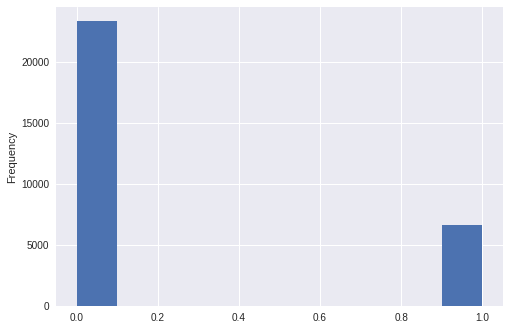

In [0]:
df['default.payment.next.month'].plot(kind='hist')

In [0]:
df.drop(['ID','default.payment.next.month'],axis=1).values

array([[2.0000e+04, 2.0000e+00, 2.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.2000e+05, 2.0000e+00, 2.0000e+00, ..., 1.0000e+03, 0.0000e+00,
        2.0000e+03],
       [9.0000e+04, 2.0000e+00, 2.0000e+00, ..., 1.0000e+03, 1.0000e+03,
        5.0000e+03],
       ...,
       [3.0000e+04, 1.0000e+00, 2.0000e+00, ..., 4.2000e+03, 2.0000e+03,
        3.1000e+03],
       [8.0000e+04, 1.0000e+00, 3.0000e+00, ..., 1.9260e+03, 5.2964e+04,
        1.8040e+03],
       [5.0000e+04, 1.0000e+00, 2.0000e+00, ..., 1.0000e+03, 1.0000e+03,
        1.0000e+03]])

# Train test split

In [0]:
### START CODE HERE ### (1~2 lines)
x_train, x_test, y_train, y_test = train_test_split(
    df.drop(['ID','default.payment.next.month'],axis=1),
    df[['default.payment.next.month']],
    test_size = 0.3,
    random_state = RAND_SEED,
    
)#call the train_test_split() function
### END CODE HERE ###

y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

x_train = x_train.astype(np.float64)
x_test = x_test.astype(np.float64)

In [0]:
x_train.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,2.100000e+04,21000.000000,21000.000000,21000.000000,21000.000000,2.100000e+04,21000.000000,21000.000000,21000.000000,21000.000000
mean,167648.746667,1.603857,1.853476,1.556476,35.468810,-0.021905,-0.141810,-0.168095,-0.223238,-0.270429,-0.297238,51028.653286,49003.502333,4.708241e+04,43299.026714,40175.132143,38761.045571,5621.100714,6.090726e+03,5286.833762,4861.353667,4855.033857,5249.062143
std,130302.004764,0.489106,0.786879,0.522872,9.229215,1.122522,1.193896,1.195070,1.162895,1.127376,1.145175,73936.884536,71470.296751,7.012686e+04,64843.888408,61176.423948,59803.761185,16533.387706,2.535105e+04,18334.173270,16448.046865,15404.708678,17734.780089
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-154973.000000,-69777.000000,-3.404100e+04,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3488.250000,2939.750000,2.685500e+03,2310.000000,1747.000000,1240.000000,1000.000000,8.517500e+02,390.000000,300.000000,249.750000,96.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22137.000000,21208.500000,2.016800e+04,19104.000000,18211.000000,17153.500000,2108.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,66635.500000,63194.250000,6.019875e+04,54571.000000,50011.500000,48899.500000,5009.000000,5.000000e+03,4500.000000,4005.000000,4003.000000,4000.000000
max,1000000.000000,2.000000,6.000000,3.000000,75.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,417990.000000,443001.000000


# Feature scaling

Notice the std of the features, 'SEX' is a categorical variable, 'PAY_0' is a ordinal variable, the rest are continuous variables

In [0]:
x_test[['SEX','PAY_0','AGE','LIMIT_BAL','BILL_AMT1','PAY_AMT1']].describe()

Scale the numerical features only, stack the returned numpy array of scaled features with a numpy array of categorical features

Tips: if df is a Pandas dataframe, you can use df.values to turn a dataframe into a numpy array

In [0]:
cate_features = ['EDUCATION','SEX','MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'] #categorical and ordinal features

### START CODE HERE ### (3~4 lines)
scaler = StandardScaler() #initiate the StandardScaler
x_train_s = scaler.fit_transform( x_train.drop(cate_features, axis=1) ) #fit the scaler with train set numerical data and then transform it
x_test_s = scaler.transform( x_test.drop(cate_features, axis=1) )#transofrm the test set

### END CODE HERE ###

In [0]:
pd.DataFrame(x_test_s).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,-0.004206,0.006028,0.008777,0.008189,-0.003292,-0.001855,0.007425,0.006171,0.008565,-0.022296,-0.011118,-0.007149,-0.012041,-0.006308
std,0.985820,0.995975,0.986415,0.986157,0.962622,0.973559,0.979241,0.986081,1.006068,0.647997,0.860730,0.831087,0.972405,1.008067
min,-1.209901,-1.567756,-2.929712,-1.630499,-2.914023,-1.448360,-1.523207,-4.143852,-0.339993,-0.240261,-0.288366,-0.295565,-0.315173,-0.295983
25%,-0.902914,-0.809277,-0.639975,-0.642506,-0.633744,-0.630985,-0.626925,-0.626640,-0.282880,-0.209019,-0.267094,-0.279514,-0.298360,-0.286073
50%,-0.212195,-0.159152,-0.378199,-0.389066,-0.387163,-0.375920,-0.364473,-0.366976,-0.212974,-0.160973,-0.189723,-0.204367,-0.217376,-0.211401
75%,0.555271,0.707682,0.232682,0.230241,0.186464,0.169522,0.170533,0.182375,-0.037371,-0.043026,-0.036672,-0.048341,-0.048414,-0.061579
max,4.469349,4.716785,9.410755,9.724082,8.341633,7.440354,7.606017,7.285634,30.204989,22.657320,22.488660,13.752881,27.373709,29.514288


Combine the array of categorical features with the scaled arrays with np.hstack([ ])

In [0]:
### START CODE HERE ### (2~4 lines)
x_train_s = np.hstack( [x_train_s, x_train[cate_features].values] )# combine x_train_s with categorical and orindal features
x_test_s = np.hstack( [x_test_s, x_test[cate_features].values] )# combine x_test_s with categorical and orindal features
### END CODE HERE ###

In [0]:
print('x_train shape:', x_train_s.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test_s.shape)
print('y_test shape:', y_test.shape)

x_train shape: (21000, 23)
y_train shape: (21000,)
x_test shape: (9000, 23)
y_test shape: (9000,)


# To be continued next lesson...

# Training with XGBoost

In [0]:
from xgboost import XGBClassifier

#Defining the model and its hyperparameters 

### START CODE HERE ### (1 line)
xgb = #specifying the mode
### END CODE HERE ###


In [0]:
#Fitting the data to the model

start = datetime.now()

### START CODE HERE ### (1 line)

#Fitting the model with x_train_s and y_train

### END CODE HERE ###

time_elapsed = datetime.now() - start
print('Time elapsed:',time_elapsed)

In [0]:
#Making the predictions

### START CODE HERE ###
y_train_pred = #predict class for x_train_s
y_train_pred_prob = #predict probability of class 1 for x_train_s

y_test_pred =  #predict class for x_test_s
y_test_pred_prob = #predict probability of class 1 for x_test_s
### END CODE HERE ###

# Evaluating the model

## Functions for model evaluations (Do NOT edit the codes here)

In [0]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (6,5)):
  df_cm = pd.DataFrame(
      confusion_matrix, index=class_names, columns=class_names, 
  )
  fig = plt.figure(figsize=figsize)
  try:
      heatmap = sns.heatmap(df_cm, annot=True, fmt="d", cmap='Reds')
  except ValueError:
      raise ValueError("Confusion matrix values must be integers.")
  heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=20)
  heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=20)
  plt.title('Confusion matrix', fontsize=25)
  plt.ylabel('True label', fontsize=17)
  plt.xlabel('Predicted label', fontsize=17)
  return fig
  

def evaluate_model(y_true, y_pred, y_pred_prob):
  '''
  y_true: a numpy array of true class label, containing 0 and 1
  y_pred: a numpy array of predicted class label, containing 0 and 1
  y_pred_prob: a numpy array of predicted probability of belonging to a class
  '''  
    
  tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
  cm = np.array([tp,fn,fp,tn]).reshape(2,2)
  acc = accuracy_score(y_true, y_pred)
  precision = precision_score(y_true, y_pred)
  recall = recall_score(y_true, y_pred)
  f1 = f1_score(y_true, y_pred)
  roc_auc = roc_auc_score(y_true, y_pred_prob)

  print('Accuracy: %.3f'%acc)
  print('Precision: %.3f'%precision)
  print('Recall: %.3f'%recall)
  print('F1 Score: %.3f'%f1)
  print('AUC score: %.3f \n'%roc_auc)
  print_confusion_matrix(cm,[1,0])
  
def plot_roc(y_true, y_pred_prob): 
  '''
  y_true: a numpy array of true class label, containing 0 and 1
  y_pred_prob: a numpy array of predicted probability of belonging to a class
  '''  
    
  fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob, pos_label=None, drop_intermediate=False)
  roc_auc = roc_auc_score(y_true, y_pred_prob)
  plt.figure()
  lw = 2
  plt.plot(fpr, tpr, color='darkorange',
          lw=lw, label='ROC curve (area = %0.3f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC Curve')
  plt.legend(loc="lower right")
  plt.show()
  
  

## Model Evaluation on train set

Read the function definitions above, determine what arguements should be passed into the functions

In [0]:
### START CODE HERE ###
evaluate_model() #What should be filled inside?
### END CODE HERE ###

In [0]:
### START CODE HERE ###
plot_roc() #What should be filled inside?
### END CODE HERE ###

## Model Evaluation on test set

In [0]:
### START CODE HERE ###
evaluate_model() #What should be filled inside?
### END CODE HERE ###

In [0]:
### START CODE HERE ###
plot_roc() #What should be filled inside?
### END CODE HERE ###

# Plotting and saving the tree graph

Set rankdir to 'UT' for up to down graph or 'LR' for left to right graph, it will generate a file called 'xgb.jpg'.

Just run the cell, no need to edit.

In [0]:
from xgboost import plot_tree
ax = plt.gca()
ax.figure.set_size_inches(25, 25)
plot_tree(xgb, ax=ax, rankdir='LR')
ax.figure.savefig('xgb.jpg')

# Feature importance
Just run the cell, no need to edit.

In [0]:
features = x_train.columns
feature_imp = pd.DataFrame(sorted(zip(xgb.feature_importances_,features)), columns=['Value','Feature'])

plt.figure(figsize=(7, 7))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('Features Importance')
plt.show()

### Question: Can you fit other machine learning models and compare the performance with XGBoost? 
Many machine learning models are available in sklearn and can be fitted in a similar manner as in XGBoost (XGBoost is compatible with sklearn).

Popoluar classification models include: Support Vector Machine, Logistic Regression, Linear Discriminant Analysis, AdaBoost (another type of tree ensemble model).

See https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model and below code for reference:


In [0]:
#Building a logistic regression classifier

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='newton-cg', random_state=RAND_SEED)

start = datetime.now()
lr.fit(x_train_s, y_train)
time_elapsed = datetime.now() - start
print('Time elapsed:',time_elapsed)

y_test_pred =  #Predict class label
y_test_pred_prob =  #Predict class probability

In [0]:
evaluate_model() #What should be filled inside?

In [0]:
plot_roc() #What should be filled inside?